In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

In [206]:
data = pd.read_excel("test.xlsx")
data.head()

,hour,date_miladi,date_shamsi,power,code,unit_no,fuel_type,mvar,temp,moisture
0,1,2020-01-13,1398/10/23,119,SO,1,A,11,3,94
1,2,2020-01-13,1398/10/23,119,SO,1,A,11,3,96
2,3,2020-01-13,1398/10/23,120,SO,1,A,10,2,95
3,4,2020-01-13,1398/10/23,120,SO,1,A,11,2,95
4,5,2020-01-13,1398/10/23,121,SO,1,A,11,2,95


In [207]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['date_shamsi', 'code', 'fuel_type']


In [208]:
# print categorical variables containing missing values
cat1 = [var for var in categorical if data[var].isnull().sum()!=0]
print(data[cat1].isnull().sum())


fuel_type    288
dtype: int64


In [209]:
data.isnull().sum()

hour             0
date_miladi      0
date_shamsi      0
power            0
code             0
unit_no          0
fuel_type      288
mvar             0
temp             0
moisture         0
dtype: int64

In [210]:
data['fuel_type'].value_counts()

A    711
Name: fuel_type, dtype: int64

In [211]:
# Change object to integer:
data[data["fuel_type"]=="A"] = 1 
data[data["fuel_type"]=="B"] = 2
data[data["fuel_type"]=="C"] = 3 

In [212]:
data['fuel_type'].value_counts()

1    711
Name: fuel_type, dtype: int64

In [213]:
data.isnull().sum()

hour             0
date_miladi      0
date_shamsi      0
power            0
code             0
unit_no          0
fuel_type      288
mvar             0
temp             0
moisture         0
dtype: int64

In [214]:
data["fuel_type"].fillna(method='bfill', inplace=True)

In [215]:
X = data[["moisture","unit_no","fuel_type","mvar","temp"]]
y = data["power"]


In [216]:
data.isnull().sum()

hour           0
date_miladi    0
date_shamsi    0
power          0
code           0
unit_no        0
fuel_type      0
mvar           0
temp           0
moisture       0
dtype: int64

In [217]:
data.fillna(data.mode, inplace=True)

In [218]:
data.isnull().sum()

hour           0
date_miladi    0
date_shamsi    0
power          0
code           0
unit_no        0
fuel_type      0
mvar           0
temp           0
moisture       0
dtype: int64

In [219]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,moisture,unit_no,fuel_type,mvar,temp
0,-0.539693,-0.630448,0.0,0.444073,-0.476823
1,-0.539693,-0.630448,0.0,0.444073,-0.476823
2,-0.539693,-0.630448,0.0,0.444073,-0.476823
3,-0.539693,-0.630448,0.0,0.444073,-0.476823
4,-0.539693,-0.630448,0.0,0.444073,-0.476823
...,...,...,...,...,...
994,-0.539693,-0.630448,0.0,0.444073,-0.476823
995,-0.539693,-0.630448,0.0,0.444073,-0.476823
996,-0.539693,-0.630448,0.0,0.444073,-0.476823
997,-0.539693,-0.630448,0.0,0.444073,-0.476823


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [221]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 2


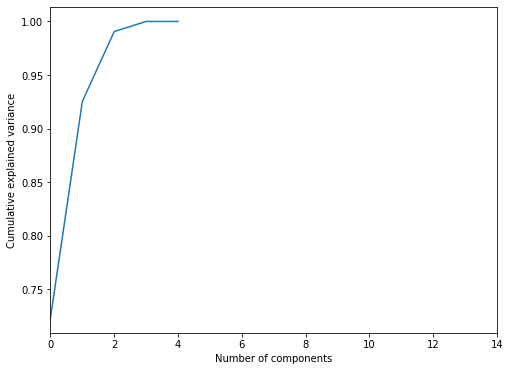

In [222]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

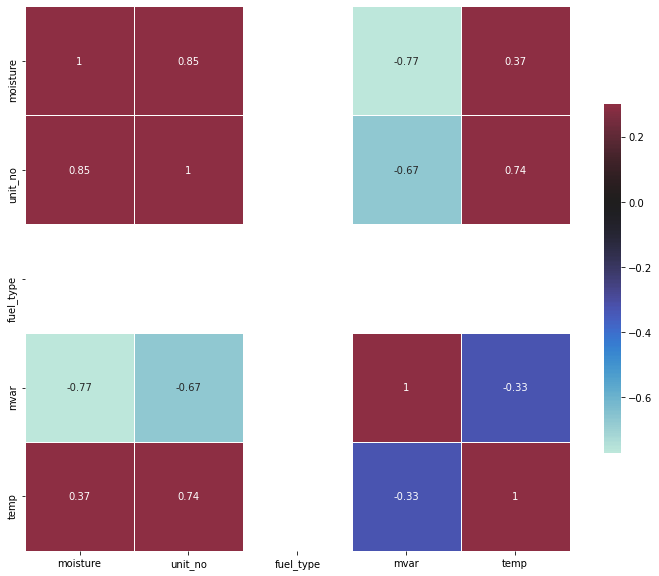

In [223]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [224]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[7.23196919e-01 2.02146434e-01 6.52513107e-02 9.40533641e-03
 4.63912530e-35]

['moisture', 'unit_no', 'fuel_type', 'mvar', 'temp']
[[ 5.20783701e-01  5.71028574e-01 -0.00000000e+00 -4.74874181e-01
   4.20957499e-01]
 [ 3.71413870e-01 -1.52646227e-01  1.11022302e-16 -4.71973726e-01
  -7.84851367e-01]
 [ 5.26206782e-01  3.27501621e-01 -1.52655666e-16  7.40454145e-01
  -2.59955324e-01]
 [-5.60305717e-01  7.37135120e-01 -1.11022302e-16 -5.88470328e-02
  -3.73130466e-01]
 [ 0.00000000e+00  1.57594637e-16  1.00000000e+00  1.35875265e-16
  -8.23165914e-17]]


In [225]:
dim_r = PCA(n_components=2)
dim_r.fit(X_train)
transformed = dim_r.transform(X_train)

In [226]:
transformed

array([[ 2.48237775, -0.86272898],
       [-1.03394709,  0.07721269],
       [-1.03394709,  0.07721269],
       ...,
       [ 2.19002575,  1.17420338],
       [-1.03394709,  0.07721269],
       [-1.03394709,  0.07721269]])

In [227]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[7.23196919e-01 2.02146434e-01 6.52513107e-02 9.40533641e-03
 4.63912530e-35]

['moisture', 'unit_no', 'fuel_type', 'mvar', 'temp']
[[ 5.20783701e-01  5.71028574e-01 -0.00000000e+00 -4.74874181e-01
   4.20957499e-01]
 [ 3.71413870e-01 -1.52646227e-01  1.11022302e-16 -4.71973726e-01
  -7.84851367e-01]
 [ 5.26206782e-01  3.27501621e-01 -1.52655666e-16  7.40454145e-01
  -2.59955324e-01]
 [-5.60305717e-01  7.37135120e-01 -1.11022302e-16 -5.88470328e-02
  -3.73130466e-01]
 [ 0.00000000e+00  1.57594637e-16  1.00000000e+00  1.35875265e-16
  -8.23165914e-17]]


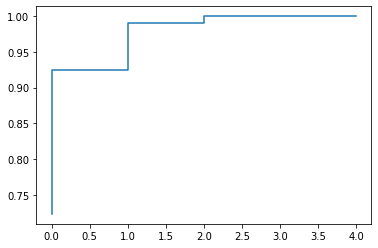

In [228]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

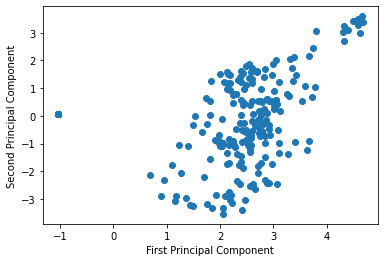

In [229]:
pca = PCA(n_components=2)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [230]:
pca = PCA(n_components=2)
pca.fit(X_train)
pca_samples = pca.transform(X_train)
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1
0,2.482378,-0.862729
1,-1.033947,0.077213
2,-1.033947,0.077213
3,-1.033947,0.077213
4,2.129459,1.579360


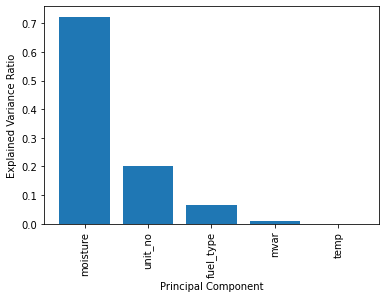

In [231]:
# Perform PCA
pca = PCA()
pca.fit(X_train)

# Get the explained variance ratio for each component
exp_var_ratio = pca.explained_variance_ratio_

# Plot a bar chart of the explained variance ratio
feature_names = list(X_train.columns)
# Plot a bar chart of the explained variance ratio with feature names
plt.bar(range(1, len(exp_var_ratio)+1), exp_var_ratio)
plt.xticks(range(1, len(feature_names)+1), feature_names, rotation=90)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

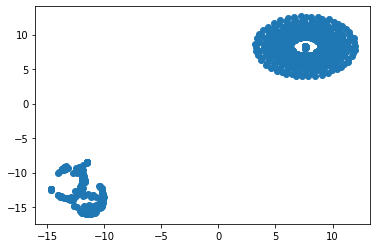

In [232]:
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X_train)
plt.scatter(X_tsne[:,0], X_tsne[:,1]) 
plt.show()

In [233]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42) 
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
sorted_features = feature_importances.sort_values('importance', ascending=False)
print(sorted_features['feature'])

0     moisture
1      unit_no
3         mvar
4         temp
2    fuel_type
Name: feature, dtype: object
